In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import sys

sys.path.insert(0, '../src')
import deepgeo.common.visualization as vis

In [5]:
DATA_DIR = '/home/raian/doutorado/Dados/generated'
DATASET = os.path.join(DATA_DIR, 'dataset_286x286_def_one_class_timestack_SR-2014-2017')
train_tfrecord = os.path.join(DATASET, 'dataset_train.tfrecord')

In [6]:
# def wrap_bytes(value):
#     return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

# def wrap_float(value):
#     return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

# def wrap_int64(value):
#     return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

# def save_to_tfrecord(out_path, imgs, labels):
#     with tf.python_io.TFRecordWriter(out_path) as writer:
# #         total_prog = imgs.shape[0]
#         for i in range(imgs.shape[0]):
# #             print_progress(i, total_prog)
#             img = imgs[i, :, :, :]
#             lbl = labels[i, :, :, :]
            
#             height = img.shape[0]
#             width = img.shape[1]
#             channels = img.shape[2]
            
#             img_raw = img.tostring()
#             lbl_raw = lbl.tostring()
            
#             feature = {'image': wrap_bytes(img_raw),
#                        'label': wrap_bytes(lbl_raw),
#                        'channels': wrap_int64(channels),
#                        'height': wrap_int64(height),
#                        'width': wrap_int64(width)}
            
#             example = tf.train.Example(features=tf.train.Features(feature=feature))
#             writer.write(example.SerializeToString())
            
# save_to_tfrecord(train_tfrecord, train_images, train_labels)

In [7]:
def parse(serialized):
    features = {'image': tf.FixedLenFeature([], tf.string, default_value=''),
                'channels': tf.FixedLenFeature([], tf.int64, default_value=0),
                'label': tf.FixedLenFeature([], tf.string, default_value=''),
                'height': tf.FixedLenFeature([], tf.int64, default_value=0),
                'width': tf.FixedLenFeature([], tf.int64, default_value=0)}

    parsed_features = tf.parse_single_example(serialized=serialized, features=features)
    num_bands = parsed_features['channels']
    height = parsed_features['height']
    width = parsed_features['width']
    
#     shape_img = tf.stack([height, width, num_bands])
#     shape_lbl = tf.stack([height, width, 1])
    
    image = tf.decode_raw(parsed_features['image'], tf.float32)
    image = tf.reshape(image, [286, 286, 10])

    label = tf.decode_raw(parsed_features['label'], tf.int32)
    label = tf.reshape(label, [286, 286, 1])
    
    print(image.shape)

    return image, label

(286, 286, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


UNIQUE Labels:  [0 1 2]
UNIQUE Labels:  [1 2]


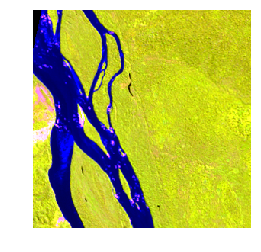

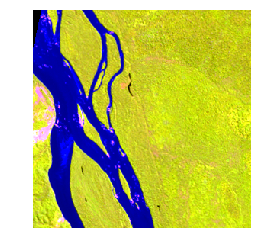

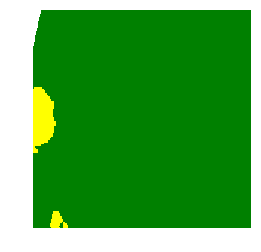

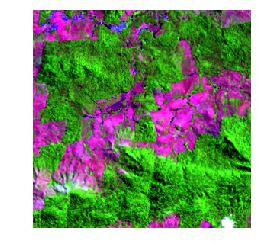

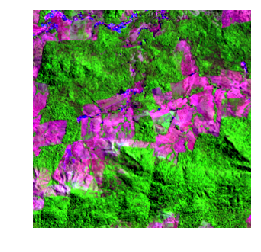

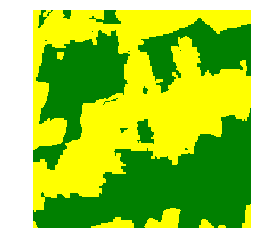

In [22]:
#TODO: Try to save the total number of chips in the TFRecord
import matplotlib.colors as mcolors
from skimage import exposure

tf.enable_eager_execution()
ds = tf.data.TFRecordDataset(train_tfrecord)
ds = ds.shuffle(5000).take(2).map(parse)
for img_t, lbl_t in ds:
    img = img_t.numpy()
    lbl = lbl_t.numpy()
    print('UNIQUE Labels: ', np.unique(lbl))
    
    cl_names = ['no_data', 'not deforestation', 'deforestation', 'clouds']
    colors=['white', 'green', 'yellow', 'blue']
    
    num_classes = len(cl_names)
    bounds = [-0.1] + list(range(0, num_classes)) + [num_classes - 0.9]
    
    for band in range(img.shape[2]):
        p2, p98 = np.percentile(img[:, :, band], (2, 98))
        img[:, :, band] = exposure.rescale_intensity(img[:, :, band], in_range=(p2, p98))
    
    
    plt.figure()
    plt.imshow(img[:,:,[3, 2, 1]])
    plt.axis('off')
    
    plt.figure()
    plt.imshow(img[:,:,[8, 7, 6]])
    plt.axis('off')
    
    
    colorMap = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(bounds, colorMap.N) 
    
    plt.figure()
    plt.imshow(lbl[:,:,0], cmap=colorMap, norm=norm)
    plt.axis('off')

In [ ]:
def _rot90(image, label):
    image = tf.image.rot90(image, 1)
    label = tf.image.rot90(label, 1)
    return image, label

def _flip_left_right(image, label):
    image = tf.image.flip_left_right(image)
    label = tf.image.flip_left_right(label)
    return image, label

In [ ]:
ds_rot = ds.map(_rot90)
ds_flip = ds.map(_flip_left_right)
ds = ds.concatenate(ds_rot)
ds = ds.concatenate(ds_flip)
ds = ds.shuffle(10)

In [ ]:
for img_t, lbl_t in ds:
    img = img_t.numpy()
    lbl = lbl_t.numpy()
    
    plt.figure()
    plt.imshow(img[:,:,[6, 5, 4]])
    
    plt.figure()
    plt.imshow(lbl[:,:,0])
    plt.colorbar()

# aaaaa


import tensorflow as tf
tf.__version__
tf.enable_eager_execution()
top = tf.data.Dataset.range(10)
for haha in top: print(haha)
for haha in top: print(haha)
def _left_parse(value):
    return value * 2
left = top.map(_left_parse)
for haha in left: print(left)
for haha in left: print(haha)
def _right_parse(value):
    return value * 3
right = top.map(_right_parse)
for haha in right: print(haha)
bottom = tf.data.Dataset.zip([left, right])
bottom = tf.data.Dataset.zip((left, right))
for haha in bottom: print(haha)
bottom = tf.data.Dataset.zip((top, left, right))
for haha in bottom: print(haha)
bottom = tf.data.Dataset.concatenate((top, left, right))
top_left = top.concatenate(left)
top_left_right = top_left.concatenate(right)
for haha in top_left_right: print(haha)
top_left_right = top_left_right.shuffle(20)
top_left_right = top_left_right.repeat(2)
for idx, haha in enumerate(top_left_right): print(idx, haha)
top_left_right = top_left_right.shuffle(100)
for idx, haha in enumerate(top_left_right): print(idx, haha)